<a href="https://colab.research.google.com/github/snsamia/Concept_Level_Sentiment_Analysis/blob/main/concept_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
      cmap = plt.get_cmap('Blues')
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    
    plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/concept_level_data.csv',encoding = "utf-8")

In [5]:
X=df['Text']
y=df['Sentiment']

# ***DATA ANALYSIS***

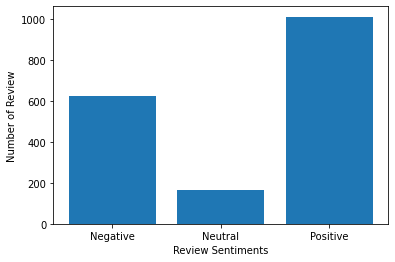

In [ ]:
Sentiment_count=df.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

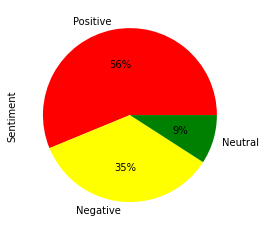

In [ ]:
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

# ***Tfidf Vectorizer***

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33, random_state = 42)
X_train_tfidf = vectorizer.fit_transform(X_train)

# ***SUPPORT VECTOR MACHINE (SVM)***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(X_train,y_train)

predictions = text_clf.predict(X_test)


In [ ]:
from sklearn.metrics import  confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))


[[ 98   7  95]
 [ 24   2  27]
 [ 67  10 265]]


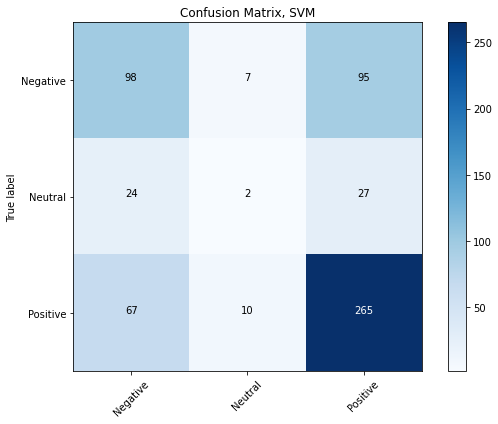

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 98,   7 , 95],
                                              [ 24 ,  2 , 27],
                                              [  67 , 10, 265]]), 
                      normalize    = False,
                      target_names = [ 'Negative', 'Neutral', 'Positive'],
                      title        = "Confusion Matrix, SVM")

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.52      0.49      0.50       200
     Neutral       0.11      0.04      0.06        53
    Positive       0.68      0.77      0.73       342

    accuracy                           0.61       595
   macro avg       0.44      0.43      0.43       595
weighted avg       0.58      0.61      0.59       595



In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)*100

61.34453781512605

# ***RANDOM FOREST***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier()
clf.fit(X_train_tfidf,y_train)
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier())])
text_clf.fit(X_train,y_train)

predictions = text_clf.predict(X_test)

In [ ]:
from sklearn.metrics import  confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[121   2  77]
 [ 21   0  32]
 [111   2 229]]


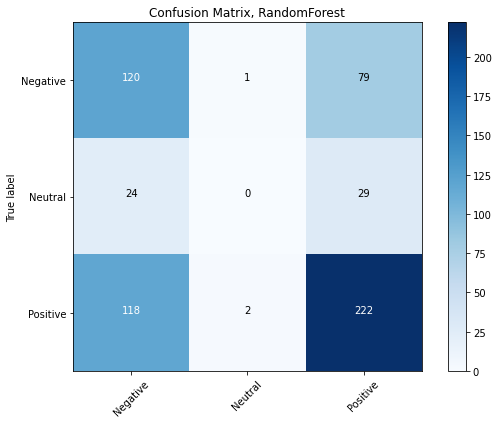

In [ ]:
plot_confusion_matrix(cm           = np.array([[120,   1,  79],
                                              [ 24,   0,  29],
                                              [ 118,   2, 222]]), 
                      normalize    = False,
                      target_names = [ 'Negative', 'Neutral', 'Positive'],
                      title        = "Confusion Matrix, RandomForest")

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.48      0.60      0.53       200
     Neutral       0.00      0.00      0.00        53
    Positive       0.68      0.67      0.67       342

    accuracy                           0.59       595
   macro avg       0.39      0.42      0.40       595
weighted avg       0.55      0.59      0.57       595



In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)*100


58.82352941176471

# ***NAIVE BAYES***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])
text_clf.fit(X_train,y_train)

predictions = text_clf.predict(X_test)

In [ ]:
from sklearn.metrics import  confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[ 60   0 140]
 [ 13   0  40]
 [ 19   0 323]]


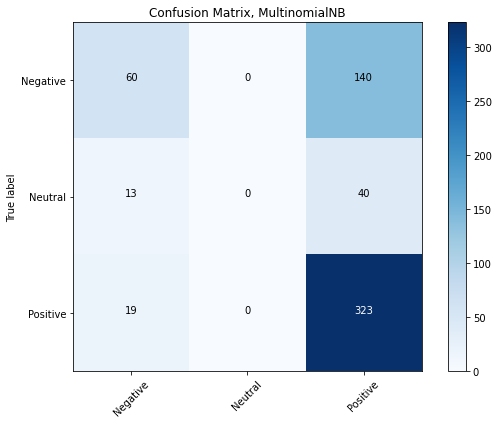

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 60,   0, 140],
                                              [ 13,   0,  40],
                                              [ 19,   0, 323]]), 
                      normalize    = False,
                      target_names = [ 'Negative', 'Neutral', 'Positive'],
                      title        = "Confusion Matrix, MultinomialNB")

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.65      0.30      0.41       200
     Neutral       0.00      0.00      0.00        53
    Positive       0.64      0.94      0.76       342

    accuracy                           0.64       595
   macro avg       0.43      0.41      0.39       595
weighted avg       0.59      0.64      0.58       595



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)*100

64.36974789915966

# ***DECISSION TREE***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf,y_train)
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',DecisionTreeClassifier())])
text_clf.fit(X_train,y_train)

predictions = text_clf.predict(X_test)

In [ ]:
from sklearn.metrics import  confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[121   8  71]
 [ 21   5  27]
 [135  20 187]]


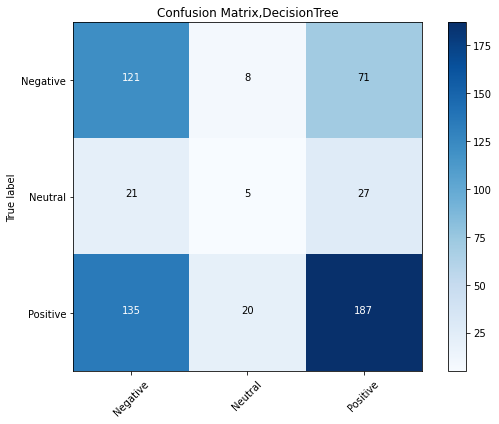

In [ ]:
plot_confusion_matrix(cm           = np.array([[121,  8,  71],
                                              [ 21,   5,  27],
                                              [ 135,  20, 187]]), 
                      normalize    = False,
                      target_names = [ 'Negative', 'Neutral', 'Positive'],
                      title        = "Confusion Matrix,DecisionTree")

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.44      0.60      0.51       200
     Neutral       0.15      0.09      0.12        53
    Positive       0.66      0.55      0.60       342

    accuracy                           0.53       595
   macro avg       0.41      0.42      0.41       595
weighted avg       0.54      0.53      0.52       595



In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)*100

52.60504201680673

# ***KNN***

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_tfidf,y_train)
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',KNeighborsClassifier())])
text_clf.fit(X_train,y_train)

predictions = text_clf.predict(X_test)


In [10]:
from sklearn.metrics import  confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[188   1  11]
 [ 52   0   1]
 [281   3  58]]


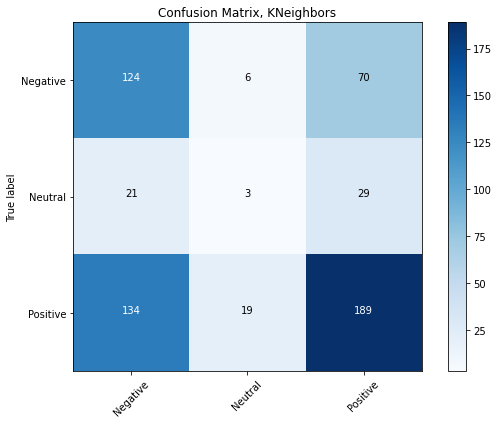

In [11]:
plot_confusion_matrix(cm           = np.array([[124,   6,  70],
                                              [  21 ,  3,   29],
                                              [ 134,   19 , 189]]), 
                      normalize    = False,
                      target_names = [ 'Negative', 'Neutral', 'Positive'],
                      title        = "Confusion Matrix, KNeighbors")

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.36      0.94      0.52       200
     Neutral       0.00      0.00      0.00        53
    Positive       0.83      0.17      0.28       342

    accuracy                           0.41       595
   macro avg       0.40      0.37      0.27       595
weighted avg       0.60      0.41      0.34       595



In [13]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)*100

41.344537815126046